### Checking out data

In [1]:
import pathlib
import random
import shutil
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import nibabel as nib
import nibabel.processing as nibp
import niwidgets as nw
from data_utils import MRAData

%load_ext autoreload
%autoreload 2

adam_path = pathlib.Path("/home/dhaval/adam_data/")

In [ ]:
# aneurysm_patients = 0

# for path in sorted(adam_path.rglob("location.txt")):
#     data = open(str(path), "r").readlines()
#     parent = path.parent.parts[-1]
    
#     print("Patient: ", str(parent), "Location: ", data)
    
#     if "train/" in str(path):
#         with open(str(adam_path.joinpath("train.txt")), "a") as train:
#             train.write(str(parent)+"\n")
    
#     elif "val/" in str(path):
#         with open(str(adam_path.joinpath("val.txt")), "a") as val:
#             val.write(str(parent)+"\n")
            
#     if len(data) > 0:
#         aneurysm_patients += 1

In [ ]:
# print(aneurysm_patients)

In [21]:
# Full adam train dataset: 
# 35B and 35F of same subject with aneurysm
# 23 unique with aneurysm
# 20 without aneurysm
# 113 cases total

# Train   and val split: 
# 26B-26F and 9B-9F
# 17      and 6
# 15      and 5

without = range(10001, 10021)
unique = range(10021, 10044)
same = range(10044, 10079)

random.seed(50)

val_without = sorted(random.sample(without, k=5))
    
val_unique = sorted(random.sample(unique, k=6))

val_same = sorted(random.sample(same, k=9))
val_same_double = []

for i in val_same:
    val_same_double.append(str(i) + 'B')
    val_same_double.append(str(i) + 'F')

val_all = val_without + val_unique + val_same_double
val_all = [str(i) for i in val_all]

print(val_all)

with open("val.txt", "w") as val:
    val.writelines([str(i)+"\n" for i in val_all])
    
all_nums = list(range(10001, 10044))
all_nums = [str(i) for i in all_nums]

for i in range(10044, 10079):
    all_nums.append(str(i)+"B")
    all_nums.append(str(i)+"F")

train_all = []
for i in all_nums:
    if i not in val_all:
        train_all.append(i)

print(train_all)

with open("train.txt", "w") as train:
    train.writelines([str(i)+"\n" for i in train_all])

['10008', '10009', '10012', '10016', '10020', '10023', '10028', '10031', '10038', '10041', '10043', '10046B', '10046F', '10049B', '10049F', '10050B', '10050F', '10051B', '10051F', '10053B', '10053F', '10054B', '10054F', '10055B', '10055F', '10066B', '10066F', '10075B', '10075F']
['10001', '10002', '10003', '10004', '10005', '10006', '10007', '10010', '10011', '10013', '10014', '10015', '10017', '10018', '10019', '10021', '10022', '10024', '10025', '10026', '10027', '10029', '10030', '10032', '10033', '10034', '10035', '10036', '10037', '10039', '10040', '10042', '10044B', '10044F', '10045B', '10045F', '10047B', '10047F', '10048B', '10048F', '10052B', '10052F', '10056B', '10056F', '10057B', '10057F', '10058B', '10058F', '10059B', '10059F', '10060B', '10060F', '10061B', '10061F', '10062B', '10062F', '10063B', '10063F', '10064B', '10064F', '10065B', '10065F', '10067B', '10067F', '10068B', '10068F', '10069B', '10069F', '10070B', '10070F', '10071B', '10071F', '10072B', '10072F', '10073B', '

In [ ]:
train_adam_path = adam_path.joinpath("train/")
val_adam_path = adam_path.joinpath("val/")

for path in sorted(adam_path.glob("*/")):
    print(path)
    patient = path.parts[-1]
    
    if patient in str(val_without) or patient in str(val_unique) or patient in val_same_double:
        shutil.move(str(path), str(val_adam_path))

    elif patient != "train" and patient != "val":
        print(patient)
        shutil.move(str(path), str(train_adam_path))
    

In [ ]:
# case_num = 10012

# MRA_path = str(adam_path.joinpath("val/", str(case_num), "orig/TOF.nii.gz"))
# MRA_reshape = str(adam_path.joinpath("val/", str(case_num), "reshape.nii.gz"))
# print(MRA_path)
# print(MRA_reshape)

# MRA = nib.load(MRA_path)

# MRA_affine = MRA.affine

# reshape = nibp.conform(MRA, MRA.header.get_data_shape(), voxel_size=(0.5, 0.5, 0.5))

# # reshape_img = nib.Nifti1Image(reshape, raw_affine)
# nib.save(reshape, MRA_reshape)

# MRA_widget = nw.NiftiWidget(MRA_path)
# MRA_widget.nifti_plotter()

# MRA_widget = nw.NiftiWidget(MRA_reshape)
# MRA_widget.nifti_plotter()

(560, 560, 140)


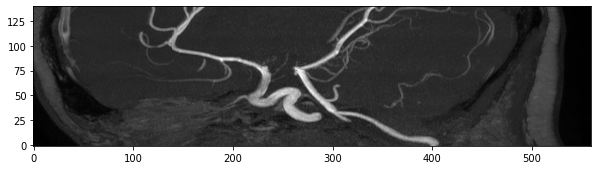

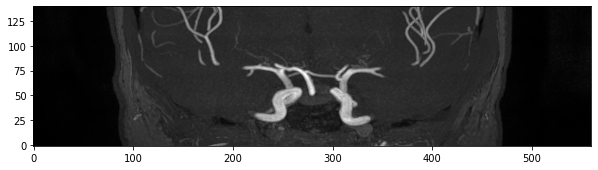

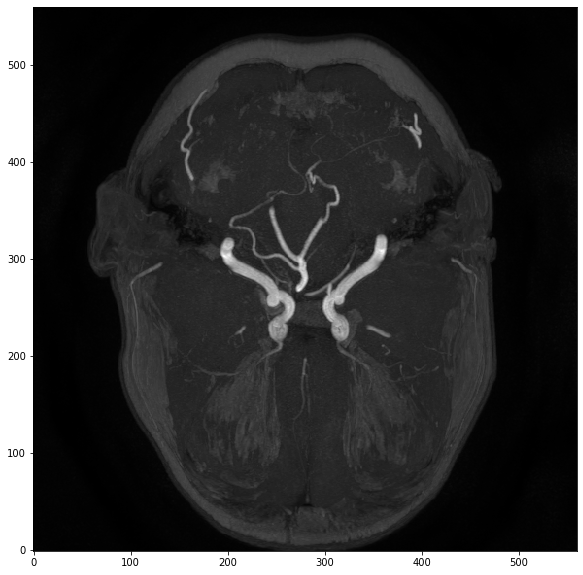

In [5]:
train_data = MRAData(adam_path, patch_size=[124, 124, 60], mode="train", transform="")

num = 1

raw_path = train_data.cases_dirs[num].joinpath("pre/TOF.nii.gz")
raw_img = nib.load(str(raw_path)).get_fdata()
shape = raw_img.shape

mipx, mipy, mipz = train_data.createMIP(num, slices_num=50)

plt.figure(figsize=(10,10))
plt.imshow(mipx[shape[0]//2].T, "gray", origin="lower")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(mipy[:,shape[1]//2,:].T, "gray", origin="lower")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(mipz[:,:,shape[2]//2].T, "gray", origin="lower")
plt.show()

In [80]:

train_data = MRAData(adam_path, patch_size=[124, 124, 60], mode="train", transform="")
num = random.randint(0, len(train_data))
raw_path = train_data.cases_dirs[num].joinpath("pre/TOF.nii.gz")
pixdim = nib.load(str(raw_path)).header["pixdim"]
print(pixdim[1:4])
# raw_img = train_data[num][0].squeeze(0)
# shape = [int(i) for i in raw_img.size()]
# print(shape)

# plt.figure(figsize=(10,10))
# plt.imshow(raw_img[shape[0]//2], "gray", origin="lower")
# plt.show()

# plt.figure(figsize=(10,10))
# plt.imshow(raw_img[:,shape[1]//2,:], "gray", origin="lower")
# plt.show()

# plt.figure(figsize=(10,10))
# plt.imshow(raw_img[:,:,shape[2]//2], "gray", origin="lower")
# plt.show()

# # MRA_widget = nw.NiftiWidget(raw_path)
# # MRA_widget.nifti_plotter()

[0.35714287 0.35714287 0.55000037]
